# Exploratory Activity 6: Analytical Chemistry I

**Specrophotometry Lab simulation procedures** 

1. Go to https://web.mst.edu/~gbert/ColorScan/AColor.htm. 
2. Fill the squirt bottle with a 10:90 solution of Red #40:DI water by adjusting the arrows. Fill a cuvette by clicking on the bottle. Measure the absorbance spectrum by clicking on the filled cuvette. 
3. Repeat step 2 for Blue #1.
4. Click on "view graph of Absorbance" to see the absorbance spectrum of each dye. Pick two wavelengths at least 50 nm apart where both dyes have non-zero absorptions. 
5. Contruct a calibration curve with 5-10 different concentrations of Red #40. Calculate the concentration in ppm and record the absorbance each of the two selected wavelengths. You can see absorbance data by clicking on "view data for Absorbance". Note you will only be able to see three concentrations at a time before dumping your data. 
6. Repeat step 5 for Blue #1.

**Question 6.1.1** Recall from lecture that the absorbance is related to the molarity of an absorbing substance by Beer's law: A = $\epsilon$*c* *l*, where *c* is the concentration in mol/L, *l* is the pathlength in cm, and $\epsilon$ is the molar absorptivity. What are the units of $\epsilon$?

**Question 6.1.2** Convert your measurements in ppm for the Red #40 solution to molarity (molar mass of Red #40 is 496.42 g/mol). 1 ppm is equal to 1 mg/L. 


In [2]:
ppm_dat = [10*13/100, 20*13/100, 30*13/100, 40*13/100, 50*13/100, 60*13/100, 70*13/100, 80*13/100, 90*13/100, 100*13/100]
ppm_dat

molarity = [];
for ppm in ppm_dat:
    molarity.append(ppm/496.42e3)


**Question 6.2** Input the data you obtained into the code below. Then run the code to plot the calibration curves of absorbance vs. molarity for both wavelengths. The code also adds best fit lines to the plot using a linear regression technique similar to that used in Exploratory Activity 2.

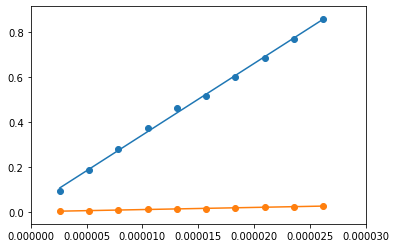

In [3]:
# first import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

## ENTER YOUR MEASURED ABSORBANCES HERE
Abs1 = [0.093,0.185,0.278,0.371,0.464,0.514, 0.599,0.685,0.770,0.856]
Abs2 = [0.003,0.006,0.008,0.011,0.014,0.015,0.018,0.021,0.023,0.026]


# using subplots again allows us to easily plot additional information in the same plot
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# compare molarity and absorbance variables using a scatter plot
ax.scatter(molarity, Abs1)
ax.scatter(molarity, Abs2)
plt.xlim(0,3e-5)
# find the lines of best fit through the data with polyfit
# line is an array containing b (the y-intercept) and m (the slope)
# cov is the covariance matrix, which will be used in the next question
line1, cov1 = np.polyfit(molarity, Abs1, 1, cov=True)
line2, cov2 = np.polyfit(molarity, Abs2, 1, cov=True)

# add the lines of best fit to the scatter plot
ax.plot(molarity, line1[1] + [conc * line1[0] for conc in molarity], '-')
ax.plot(molarity, line2[1] + [conc * line2[0] for conc in molarity], '-')

**Question 6.3** Based on the calibration slopes derived above, what is the molar absorptivity of your assigned dye at each of the wavelengths of interest? Assume the length of the cuvette is 1 cm. 

In [25]:
## ENTER THE MOLAR ABSORPTIVITIES (EPSILON) HERE
epsilon1 = line1[0]
epsilon2 = line2[0]


955.811002331002

**Question 6.4** The code below uses the covariance matrices of the best fit lines to calculate the standard deviation of the slopes, which could be interpreted as the error in the molar absorptivities. 

In [23]:
# take the square root of the first element of the first row of each matrix
stdev1 = np.sqrt(cov1[0][0])
stdev2 = np.sqrt(cov2[0][0])

# display the standard deviations
print(stdev1, stdev2)

514.0587360199243 18.943463044349354


**Question 6.5** Repeat the above for the Blue #1 solution (molar mass 791.84 g/mol)

{conc_dye1: 2.21478432204038e-5, conc_dye2: 2.32814448919662e-5}

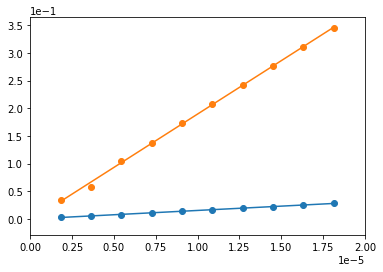

In [37]:
ppm_dat = [10*9/100, 20*9/100, 30*9/100, 40*9/100, 50*9/100, 60*9/100, 70*9/100, 80*9/100, 90*9/100, 100*9/100]
ppm_dat

molarity = [];
for ppm in ppm_dat:
    molarity.append(ppm/496.42e3)

Abs1 = [0.003,0.005,0.008,0.011,0.014,0.017,0.020,0.022,0.025,0.028]
Abs2 = [0.035,0.058,0.104,0.138,0.173,0.207,0.242,0.276,0.311,0.345]

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# compare molarity and absorbance variables using a scatter plot
ax.scatter(molarity, Abs1)
ax.scatter(molarity, Abs2)
ax.ticklabel_format(style = 'sci', scilimits = (0,0))
plt.xlim(0,2e-5)
# find the lines of best fit through the data with polyfit
# line is an array containing b (the y-intercept) and m (the slope)
# cov is the covariance matrix, which will be used in the next question
line1, cov1 = np.polyfit(molarity, Abs1, 1, cov=True)
line2, cov2 = np.polyfit(molarity, Abs2, 1, cov=True)

# add the lines of best fit to the scatter plot
ax.plot(molarity, line1[1] + [conc * line1[0] for conc in molarity], '-')
ax.plot(molarity, line2[1] + [conc * line2[0] for conc in molarity], '-')

epsilon1_dye2 = line1[0]
epsilon2_dye2 = line2[0]


from sympy import Eq, Symbol as sym, solve
conc_dye1 = sym('conc_dye1')
conc_dye2 = sym('conc_dye2')

unknown_Abs1 = Eq((epsilon1 * conc_dye1) + (epsilon1_dye2 * conc_dye2),0.74)
unknown_Abs2 = Eq((epsilon2 * conc_dye1) + (epsilon2_dye2 * conc_dye2),0.47)

sol = solve((unknown_Abs1,unknown_Abs2),(conc_dye1,conc_dye2))
sol

**Question 6.6** Use your answers to Questions 6.3-5 to calculate the concentrations (and uncertainties!) of Red #40 and Blue #1 in an unknown sports drink sample. Imagine that for your shorter wavelength you measure an absorbance of 0.74 and for your longer wavelength you measure an absorbance of 0.47. You may assume for the purposes of this question that the standard deviations from the covariance matrices give reasonable estimates of the uncertainties in the molar absorptivities and that the absorbances are known to arbitrary precision.

Check your answers with your partner and intructor.

In [ ]:
# students will need to solve the system of equations below by substituting
# the observed absorbances of their unknown for unknown_Abs1 and unknown_Abs2
# and solving for conc_dye1 and conc_dye2
unknown_Abs1 = (epsilon1 * conc_dye1) + (epsilon1_dye2 * conc_dye2)
unknown_Abs2 = (epsilon2 * conc_dye1) + (epsilon2_dye2 * conc_dye2)

# they should propagate the error in the epsilon values corresponding to
# any calculations they perform in solving for conc_dye1 and conc_dye2

**Question 6.7** How would your answers to Question 6.6 be different (higher or lower) if you had used an empty cuvette instead of one filled with water to "blank" the spectrophotometer?


**Question 6.8** Atmospheric scientists rarely worry about dye concentrations in sports drinks. How might the concepts in this experiment be relevant to atmospheric science? Be specific.
